In [5]:
from LB import LB 
from boundaries import * 
import numpy as np
import matplotlib.pyplot as plt
from IPython import display

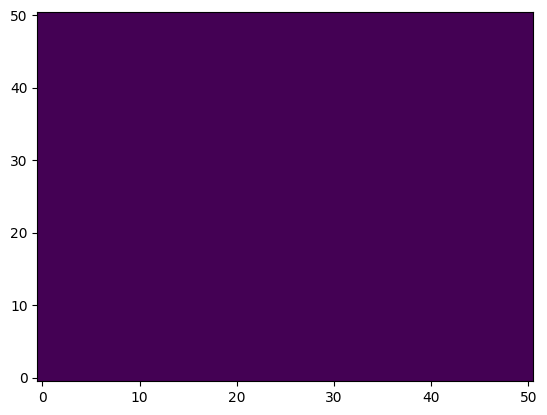

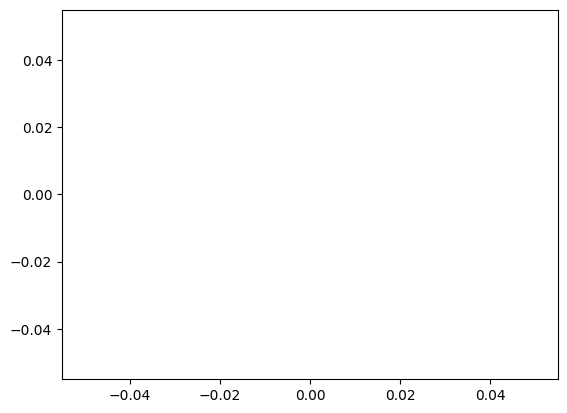

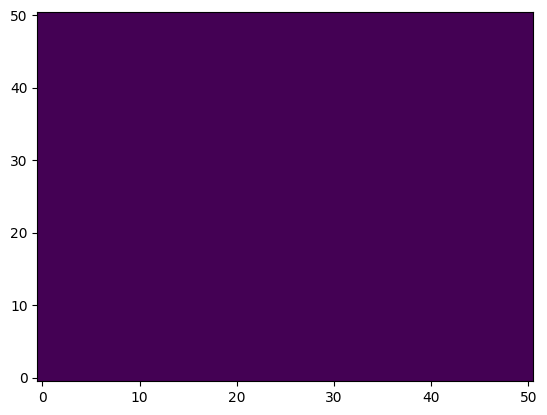

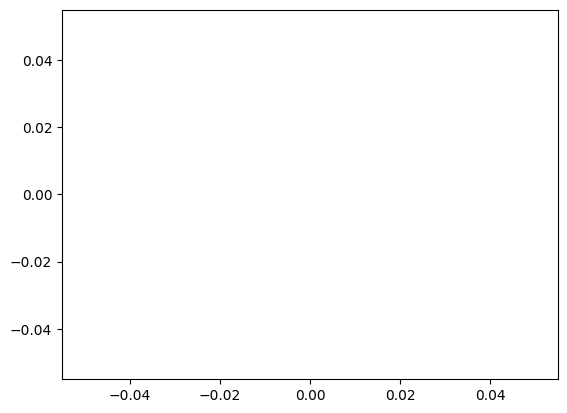

In [6]:
lb = LB()
lb.omega = 1
lb.fitParams()

pIn = 0.31
pOut = 0.3
cs = 1/np.sqrt(3)
viscosity = (1/3)*((1/lb.omega) - 0.5) 
y = np.arange(lb.Ny)

In [7]:
def simulate(timesteps=1000, showDensityPlot=False, showVelocityPlot=False, SAVE_EVERY=1):  

    # boundaries to apply to the simulation 
    boundaries = []
    boundaries.append(TopWallBoundary(lb))
    boundaries.append(BottomWallBoundary(lb))
    boundaries.append(HorizontalInletOutletBoundary(lb, lb.Ny, pIn, pOut, cs))

    fig, ax = plt.subplots()
    fig2, ax2 = plt.subplots()
    figs, axes = [fig, fig2], [ax, ax2]

    for i in range(timesteps):

        # boundaries caching values before streaming 
        for boundary in boundaries: 
            boundary.before()

        # apply drift/stream
        lb.streaming()

        # Recalc local variables 
        lb.calculateDensity()
        lb.calculateVelocity()

        # apply collision
        lb.collision()

        for boundary in boundaries: 
            boundary.after()

        # lb.calculateDensity()
        # lb.calculateVelocity()

        if showDensityPlot:
            if i % SAVE_EVERY == 0:
                lb.updateDensityFigure(lb.rho, timestep = i)
                display.display(lb.densityFig)
                display.clear_output(wait=True)
                
        if showVelocityPlot:
            if i % SAVE_EVERY == 0:
                lb.updateVelocityFigure(lb.ux, lb.uy, timestep = i)
                display.display(lb.velocityFig)
                display.clear_output(wait=True)

        if i % SAVE_EVERY == 0:
            axes[0].cla()
            dynamic_viscosity = (lb.rho[:, lb.Nx//2] * viscosity)
            partial_derivative = (pOut - pIn) / lb.Nx
            analytical = (-0.5 * partial_derivative * y * (lb.Ny - 1 - y)) / dynamic_viscosity
            #axes[0].plot(lb.ux[:, lb.Nx//2], y)
            axes[0].plot(analytical, y)
            axes[0].plot(analytical, y)
            axes[0].set_ylabel('y')
            axes[0].set_xlabel('velocity')
            axes[0].legend(['Simulated', 'Analytical'])
            figs[0].savefig(f"./plots/poiseuille_flow/img_{i}", bbox_inches='tight', pad_inches=0)

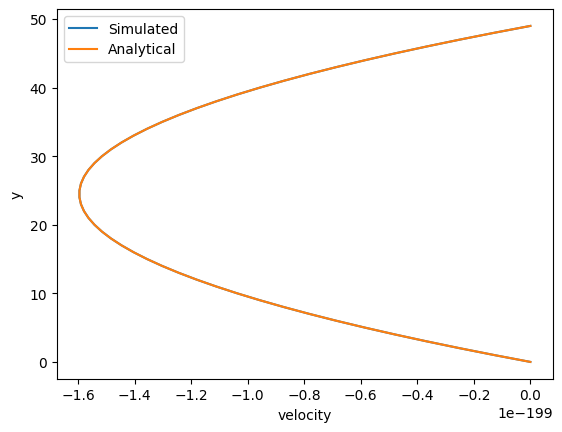

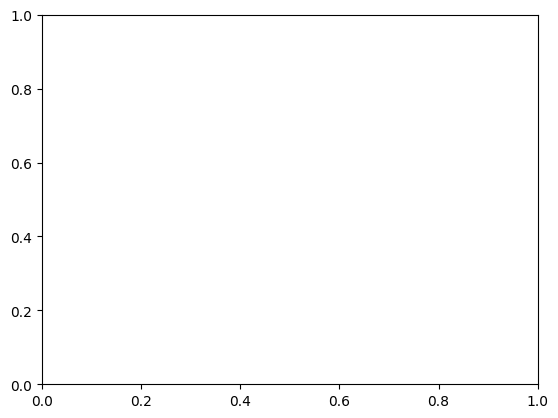

In [8]:
simulate(timesteps=1000, showVelocityPlot=True, SAVE_EVERY=100)